## How to generate exact sampling coefficients

This how-to guide is intended to show users how they can generate exact sampling coefficients to be used in reconstructing the simulated expectation value of the original circuit.

First, we set up a simple cutting problem following the [first tutorial](../tutorials/01_gate_cutting_to_reduce_circuit_width.ipynb).

In [1]:
import numpy as np
from qiskit.circuit.library import EfficientSU2
from qiskit.quantum_info import PauliList

from circuit_knitting.cutting import (
    partition_problem,
    generate_cutting_experiments,
)

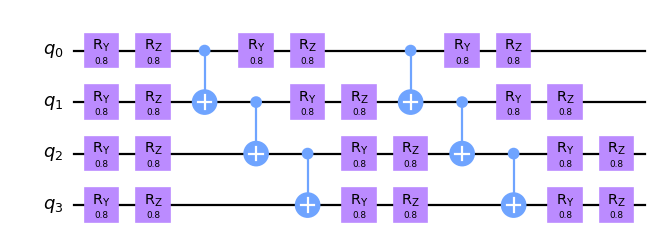

In [2]:
circuit = EfficientSU2(4, entanglement="linear", reps=2).decompose()
circuit.assign_parameters([0.8] * len(circuit.parameters), inplace=True)
observables = PauliList(["ZZZZ"])
circuit.draw("mpl", scale=0.8)

Partition the circuit between qubits 1 and 2 by cutting 2 CNOT gates.

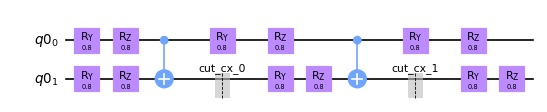

In [3]:
partitioned_problem = partition_problem(
    circuit=circuit, partition_labels="AABB", observables=observables
)
subcircuits = partitioned_problem.subcircuits
bases = partitioned_problem.bases
subobservables = partitioned_problem.subobservables
subcircuits["A"].draw("mpl", scale=0.6)

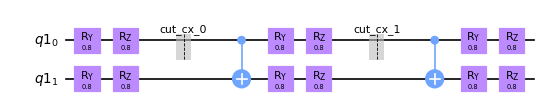

In [4]:
subcircuits["B"].draw("mpl", scale=0.6)

### Demonstrate how to obtain all weights exactly

If you wish to calculate all weights exactly, no matter how small, you can achieve this by passing infinity (`np.inf`) to `num_samples`:

In [5]:
subexperiments, coefficients = generate_cutting_experiments(
    circuits=subcircuits,
    observables=subobservables,
    num_samples=np.inf,
)
coefficients

[(0.24999999999999992, <WeightType.EXACT: 1>),
 (0.24999999999999992, <WeightType.EXACT: 1>),
 (0.24999999999999992, <WeightType.EXACT: 1>),
 (-0.24999999999999992, <WeightType.EXACT: 1>),
 (0.24999999999999992, <WeightType.EXACT: 1>),
 (-0.24999999999999992, <WeightType.EXACT: 1>),
 (0.24999999999999992, <WeightType.EXACT: 1>),
 (0.24999999999999992, <WeightType.EXACT: 1>),
 (0.24999999999999992, <WeightType.EXACT: 1>),
 (-0.24999999999999992, <WeightType.EXACT: 1>),
 (0.24999999999999992, <WeightType.EXACT: 1>),
 (-0.24999999999999992, <WeightType.EXACT: 1>),
 (0.24999999999999992, <WeightType.EXACT: 1>),
 (0.24999999999999992, <WeightType.EXACT: 1>),
 (0.24999999999999992, <WeightType.EXACT: 1>),
 (-0.24999999999999992, <WeightType.EXACT: 1>),
 (0.24999999999999992, <WeightType.EXACT: 1>),
 (-0.24999999999999992, <WeightType.EXACT: 1>),
 (-0.24999999999999992, <WeightType.EXACT: 1>),
 (-0.24999999999999992, <WeightType.EXACT: 1>),
 (-0.24999999999999992, <WeightType.EXACT: 1>),
 (0.

### Demonstrate how to find the minimum `num_samples` needed to retrieve all exact weights for 2 CNOT cuts

When `num_samples` is set to a finite number, each weight whose absolute value is above a threshold of 1 / `num_samples` will be evaluated exactly.  The remaining weights -- those in the tail of the distribution -- will then be sampled from, resulting in at most `num_samples` unique weights.

In the case of a CNOT gate -- or any gate equivalent to it up to single-qubit unitaries -- each of the six weights of the quasi-probability decomposition have the same magnitude, so each gets sampled with a probability of $1/6$:

In [6]:
print(f"Mapping probabilities for a CNOT decomposition: {bases[0].probabilities}")

Mapping probabilities for a CNOT decomposition: [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


In this example, we have cut two CNOT gates. Given that the probability of any given mapping in a CNOT decomposition is $1/6$, the probability of any given mapping in the _joint_ distribution combining the two cut CNOT gates is $(1/6)^2$. Therefore, we need to take at least $6^2$ weights in order to retrieve all exact weights from `generate_cutting_experiments`.

In [7]:
from circuit_knitting.cutting.qpd import QPDBasis
from qiskit.circuit.library.standard_gates import CXGate

qpd_basis_cx = QPDBasis.from_instruction(CXGate())


def _min_nonzero(seq, /):
    """Return the minimum value in a sequence, ignoring values near zero."""
    return min(x for x in seq if not np.isclose(x, 0))


num_cx_cuts = 2

print(
    f"Number of samples needed to retrieve exact weights: {1 / _min_nonzero(qpd_basis_cx.probabilities)**num_cx_cuts}"
)

Number of samples needed to retrieve exact weights: 36.0


#### Observe the coefficient weights returned from `generate_cutting_experiments` are `WeightType.EXACT`

Above, we determined 36 samples would trigger the coefficients to be returned as exact. Here we set `num_samples` to exactly 36 to test this.

In [8]:
subexperiments, coefficients = generate_cutting_experiments(
    circuits=subcircuits,
    observables=subobservables,
    num_samples=36,
)
coefficients

[(0.25, <WeightType.EXACT: 1>),
 (0.25, <WeightType.EXACT: 1>),
 (0.25, <WeightType.EXACT: 1>),
 (-0.25, <WeightType.EXACT: 1>),
 (0.25, <WeightType.EXACT: 1>),
 (-0.25, <WeightType.EXACT: 1>),
 (0.25, <WeightType.EXACT: 1>),
 (0.25, <WeightType.EXACT: 1>),
 (0.25, <WeightType.EXACT: 1>),
 (-0.25, <WeightType.EXACT: 1>),
 (0.25, <WeightType.EXACT: 1>),
 (-0.25, <WeightType.EXACT: 1>),
 (0.25, <WeightType.EXACT: 1>),
 (0.25, <WeightType.EXACT: 1>),
 (0.25, <WeightType.EXACT: 1>),
 (-0.25, <WeightType.EXACT: 1>),
 (0.25, <WeightType.EXACT: 1>),
 (-0.25, <WeightType.EXACT: 1>),
 (-0.25, <WeightType.EXACT: 1>),
 (-0.25, <WeightType.EXACT: 1>),
 (-0.25, <WeightType.EXACT: 1>),
 (0.25, <WeightType.EXACT: 1>),
 (-0.25, <WeightType.EXACT: 1>),
 (0.25, <WeightType.EXACT: 1>),
 (0.25, <WeightType.EXACT: 1>),
 (0.25, <WeightType.EXACT: 1>),
 (0.25, <WeightType.EXACT: 1>),
 (-0.25, <WeightType.EXACT: 1>),
 (0.25, <WeightType.EXACT: 1>),
 (-0.25, <WeightType.EXACT: 1>),
 (-0.25, <WeightType.EXACT: 

In [9]:
import qiskit.tools.jupyter  # noqa: F401

%qiskit_version_table